In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Load the dataset
df = pd.read_csv("wine.csv")

In [4]:
# 1. Basic data exploration
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [5]:
print(df.describe())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

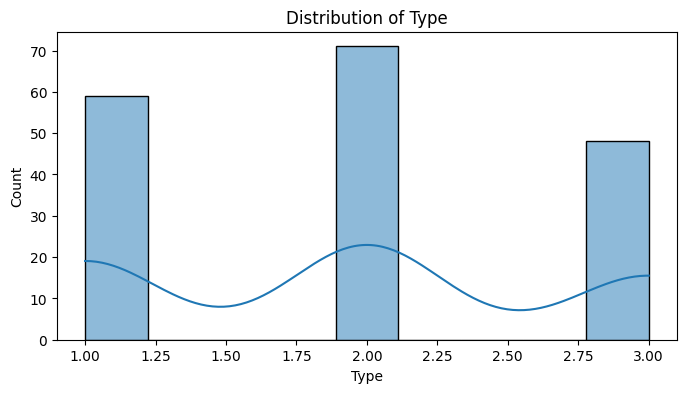

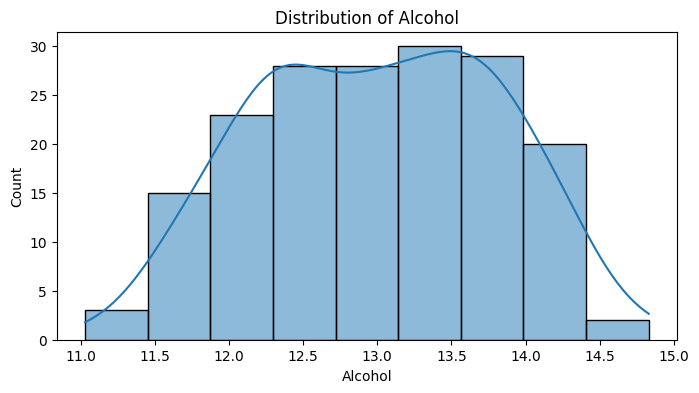

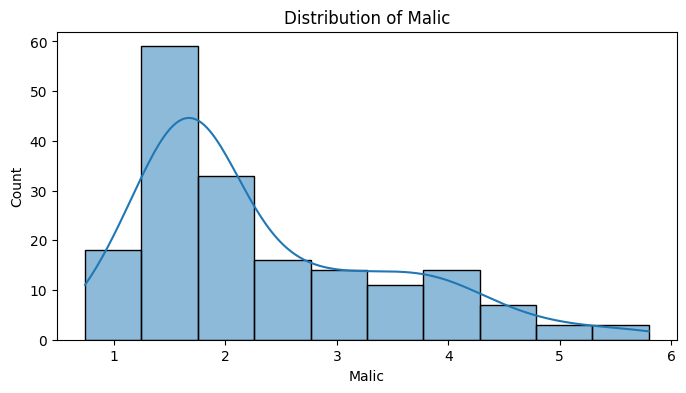

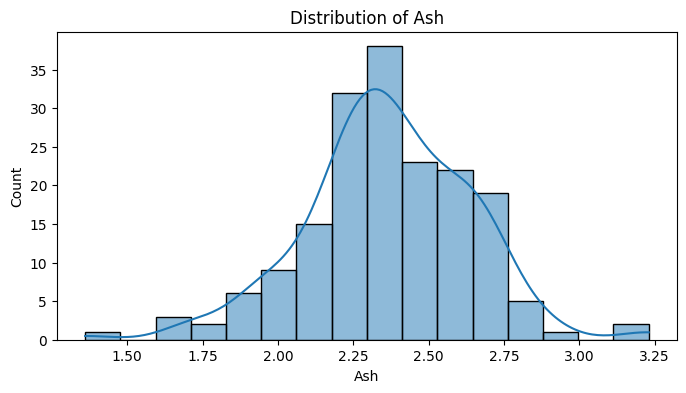

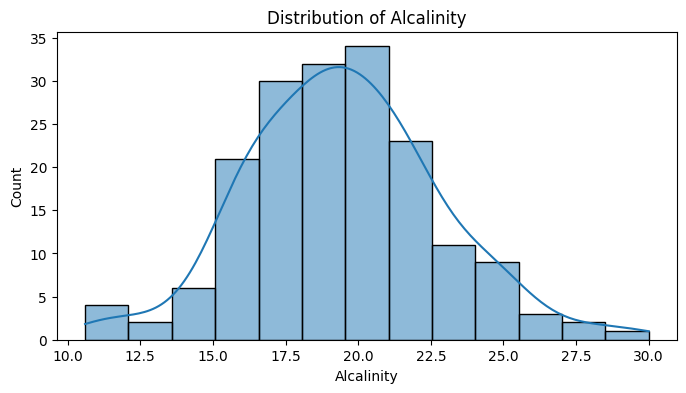

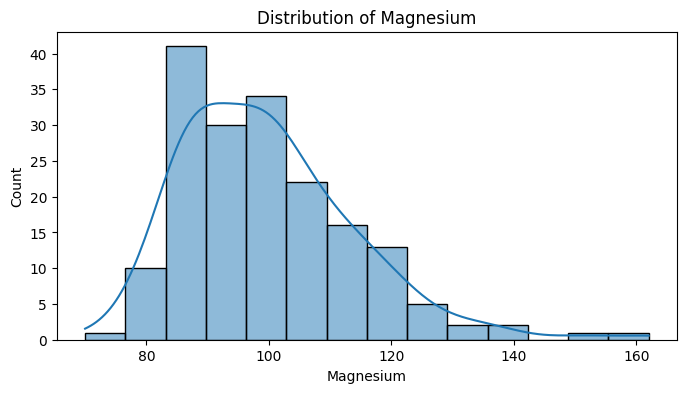

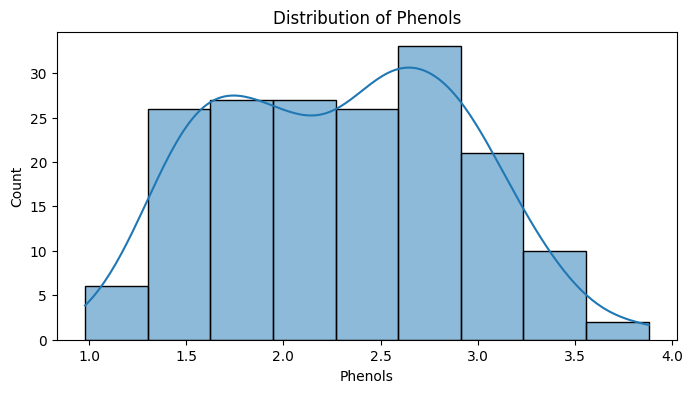

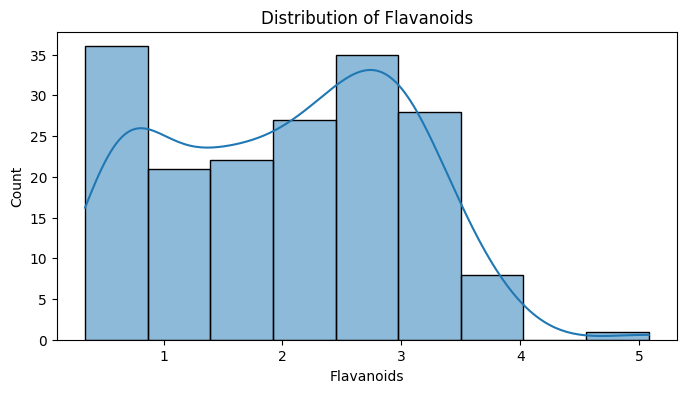

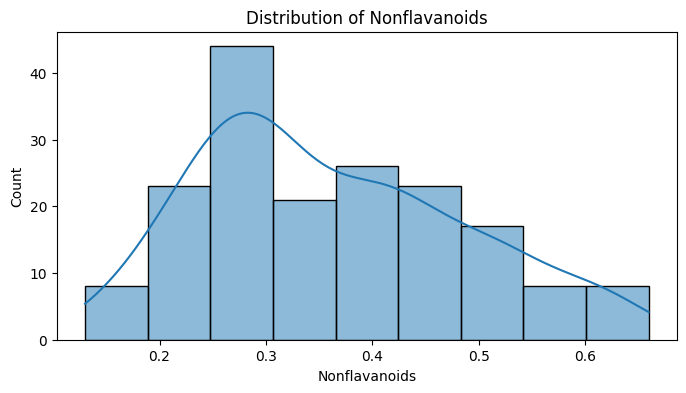

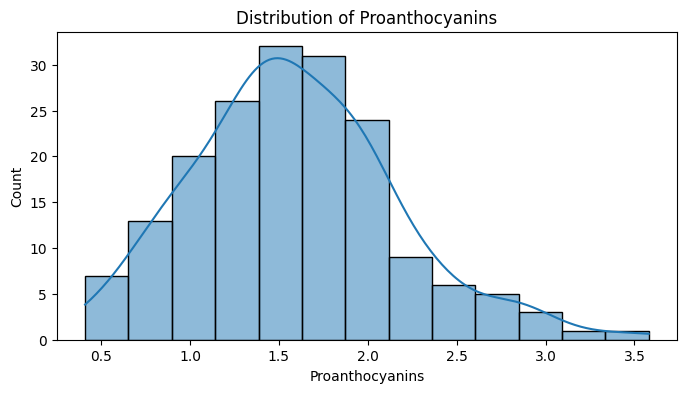

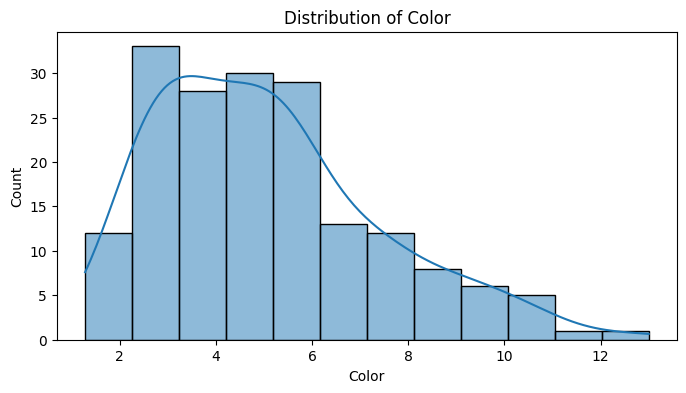

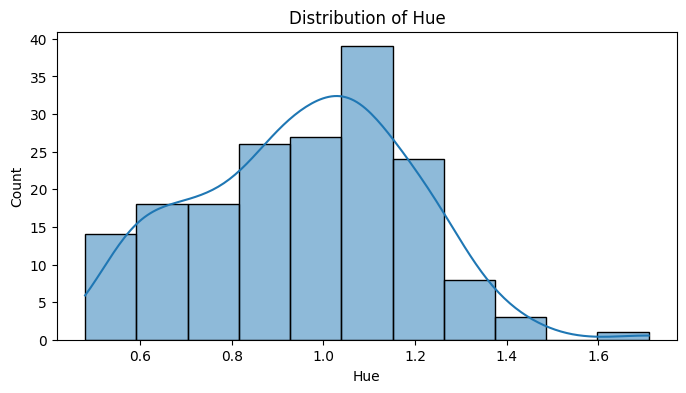

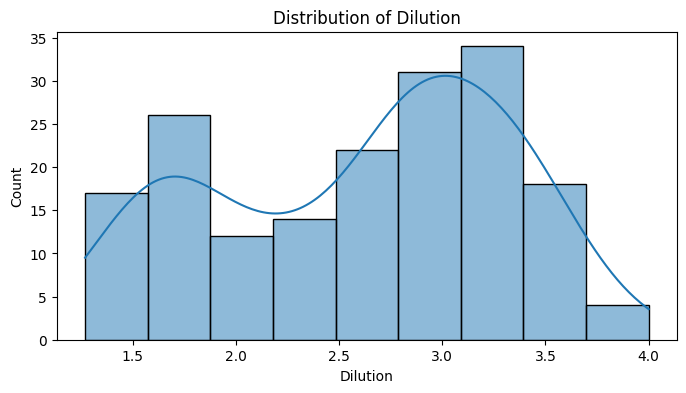

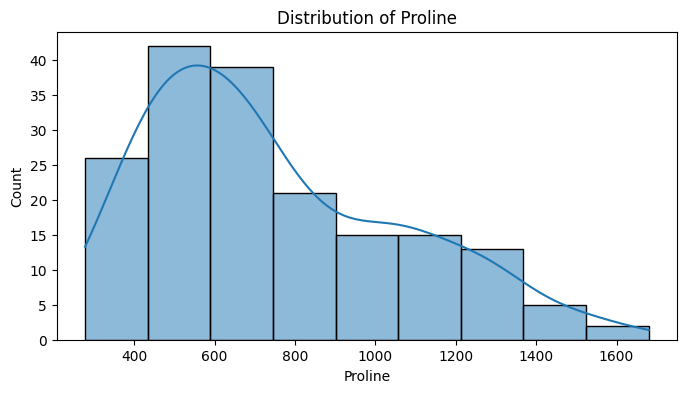

In [6]:
# 2. Visualize distributions
numerical_features = df.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

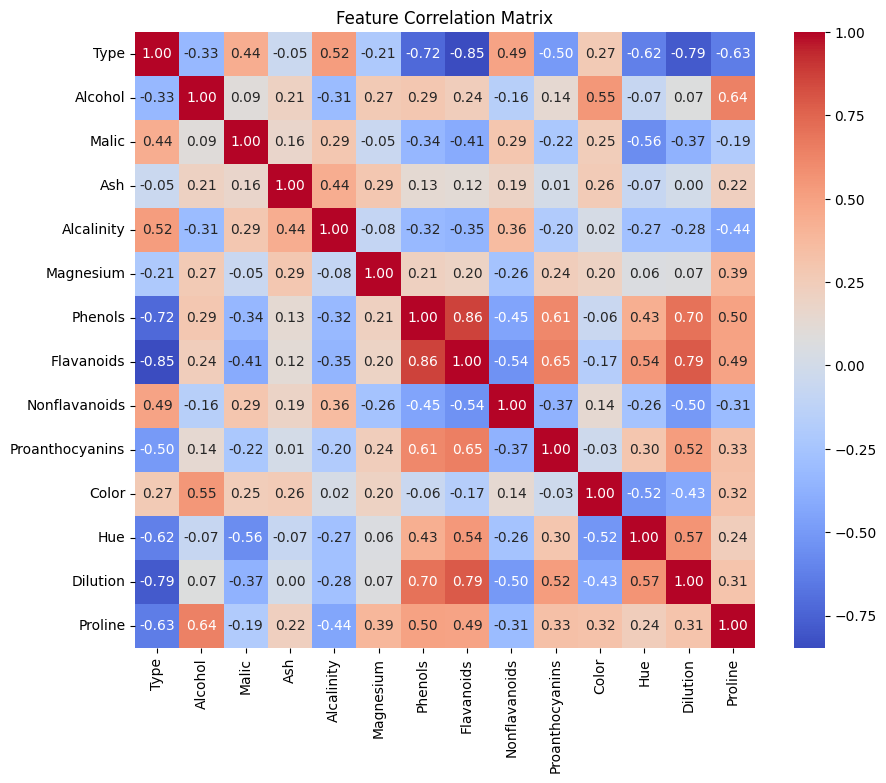

In [7]:
# 3. Correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [8]:
# 1. Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_features])

In [9]:
# 2. Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

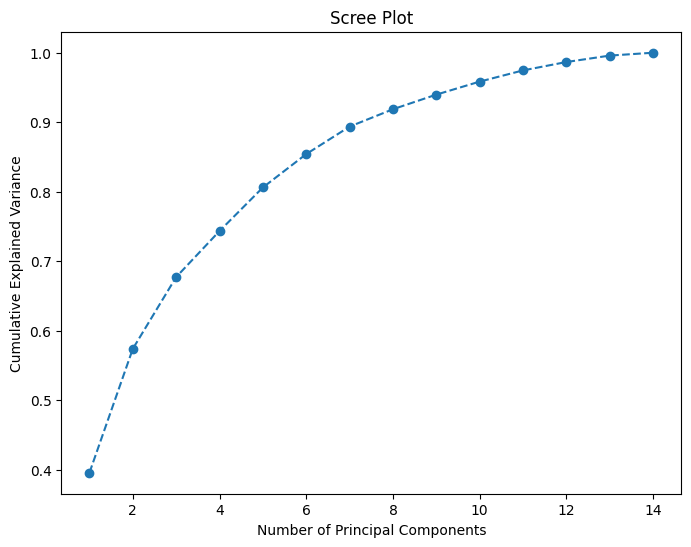

In [10]:
# Scree plot for explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [12]:
# Choose the number of components (e.g., 95% variance explained)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")

pca = PCA(n_components=optimal_components)
reduced_data = pca.fit_transform(scaled_data)

Optimal number of components: 10


In [13]:
# 1. Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(scaled_data)

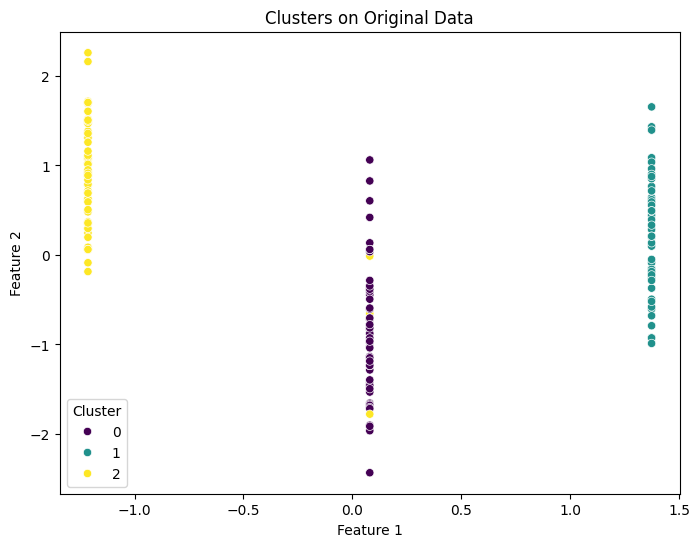

In [14]:
# 2. Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters_original, palette="viridis")
plt.title('Clusters on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [15]:
# 3. Evaluate clustering performance
sil_original = silhouette_score(scaled_data, clusters_original)
db_original = davies_bouldin_score(scaled_data, clusters_original)
print(f"Silhouette Score (Original Data): {sil_original}")
print(f"Davies-Bouldin Index (Original Data): {db_original}")

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773


In [16]:
#Clustering with PCA Data
# 1. Apply K-Means on PCA data
clusters_pca = kmeans.fit_predict(reduced_data)

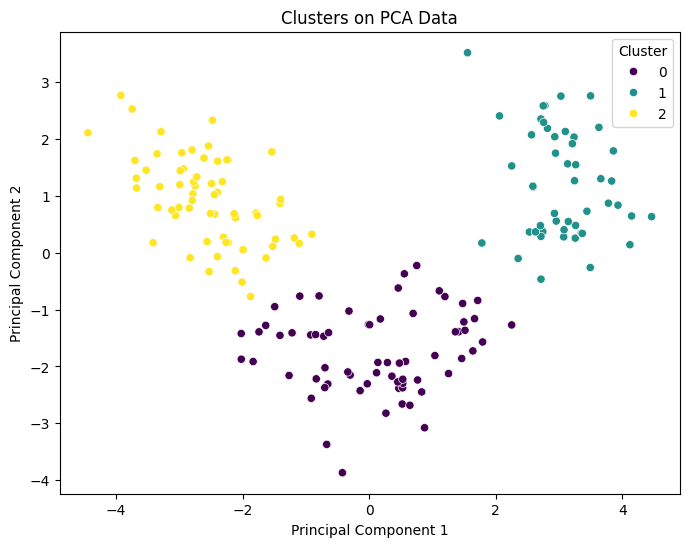

In [17]:
# 2. Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters_pca, palette="viridis")
plt.title('Clusters on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [18]:
# 3. Evaluate clustering performance
sil_pca = silhouette_score(reduced_data, clusters_pca)
db_pca = davies_bouldin_score(reduced_data, clusters_pca)
print(f"Silhouette Score (PCA Data): {sil_pca}")
print(f"Davies-Bouldin Index (PCA Data): {db_pca}")

Silhouette Score (PCA Data): 0.32292055407233
Davies-Bouldin Index (PCA Data): 1.2578453408449182


In [19]:
#Comparison and Analysis
print(f"Comparison:\nOriginal Data - Silhouette: {sil_original}, DB Index: {db_original}")
print(f"PCA Data - Silhouette: {sil_pca}, DB Index: {db_pca}")

Comparison:
Original Data - Silhouette: 0.30648398324833453, DB Index: 1.315707552261773
PCA Data - Silhouette: 0.32292055407233, DB Index: 1.2578453408449182


In [20]:
print("Key Findings:")
if sil_pca > sil_original:
    print("PCA improved clustering performance based on the Silhouette Score.")
else:
    print("Original data provided better clustering performance based on the Silhouette Score.")

Key Findings:
PCA improved clustering performance based on the Silhouette Score.


Comparison of Results :

Silhouette Score:

Original Data: 0.3065

PCA Data: 0.3229

Interpretation:

The silhouette score is slightly higher for the PCA-transformed data, indicating that clusters formed in the reduced-dimensional space are slightly more well-separated and cohesive compared to the original data.
Davies-Bouldin Index (DB Index):

Original Data: 1.3157

PCA Data: 1.2578

Interpretation:

A lower DB Index for PCA-transformed data suggests that the clusters are more compact and have better separation, reinforcing that PCA improved clustering performance.

Recommendation:

Use PCA as a preprocessing step when working with datasets with high dimensionality or when initial clustering performance on the raw data is suboptimal.

For datasets with few features or where interpretability is paramount, clustering directly on the original data might be more practical.